# Analisando Engajamento no Instagram (Parte 1)

## Pergunta Fundamental

Desejamos obter respostas para a seguinte pergunta:

- Qual tipo de conteúdo gera mais engajamento na empresa?

## Base de Dados

A base de dados disponível reúne informações sobre as publicações de uma empresa desde de que ela começou a publicar no Instagram até o dia 27/mar.

## Direcionamentos do Cliente

Estes foram os direcionamentos passados pelo cliente:

- Ignore a coluna de visualizações, porque queremos entender quais variáveis contribuem para um maior número de curtidas e comentários
- Publicações sem tags realmente não possuem nenhuma tag
- A ausência de uma tag deve ser tratada como um valor vazio

## Análise da Base de Dados

### Importação de Bibliotecas

In [1]:
# Importa o numpy com o apelido np
import numpy as np

# Importa o pandas com o apelido pd
import pandas as pd

# Importa o pyplot com o apelido plt
from matplotlib import pyplot as plt

### Importação da Base de Dados

In [2]:
# Lê o arquivo especificado
base = pd.read_excel('dados-instagram.xlsx')

In [3]:
# Exibe as cinco primeiras linhas do dataframe
base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


### Remoção de Colunas Irrelevantes

In [4]:
# Remove a coluna especificada
base = base.drop('Visualizações', axis='columns')

In [5]:
# Exibe as cinco primeiras linhas
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [6]:
# Exibe as cinco últimas linhas
base.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


### Obtendo Informações sobre a Base

In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


**Observações:**

- Os tipos de dados de cada coluna estão corretos
- A coluna `Tags` possui 8 valores nulos
- A coluna `Carrossel` possui 44 valores nulos

De acordo com os direcionamentos do cliente, os 8 valores nulos da coluna `Tags` são realmente valores nulos, significando que essas publicações não receberam nenhuma tag.

Precisamos entender por que a coluna `Carrossel` está repleta de valores nulos para podermos decidir o que fazer com estes valores.

### Tratando a Base

#### Preenchendo Valores Nulos

De acordo com o resumo acima, a coluna `Carrossel` possui somente 8 valores não nulos. Vamos exibir estes valores para poder investigá-los: 

In [8]:
# Filtra a base de forma a exibir os registros não nulos da coluna Carrossel
base.loc[base['Carrossel'].notnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
28,Foto,2022-01-15,9936,119,Novos Produtos,S,N,S,10055
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834


In [9]:
# Filtra a base de forma a exibir somente os registros nulos da coluna Carrossel
# Exibe somente as cinco primeiras linhas
base.loc[base['Carrossel'].isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


**Observações:**

As publicações que eram um carrossel foram registradas com um **S**, representando um **Sim**. Portanto, as demais publicações que não eram um carrossel deveriam ter sido registradas com um **N**, representando um **Não**. Vamos corrigir isso: 

In [10]:
# Atribui o valor N aos registros nulos da coluna Carrossel
base.loc[base['Carrossel'].isnull(), 'Carrossel'] = 'N'

In [11]:
# Exibe as cinco primeiras linhas da base
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [12]:
base['Carrossel'].value_counts()

N    44
S     8
Name: Carrossel, dtype: int64

**Observações:**

Notamos que agora a coluna `Carrossel` possui 8 valores 'S' e 44 valores 'N'.

### Descrição Estatística da Base

In [13]:
# Exibe uma descrição estatística da coluna de Curtidas
base['Curtidas'].describe()

count       52.000000
mean     12262.730769
std       8165.875326
min       2807.000000
25%       5492.000000
50%       9603.000000
75%      17621.750000
max      37351.000000
Name: Curtidas, dtype: float64

**Obervações:**

- A média de curtidas das publicações foi de 12.262
- 50% das publicações têm até 9.603 curtidas
- A publicação com maior número de curtidas recebeu 37.351 curtidas
- A publicação com menor número de curtidas recebeu 2.807 curtidas

In [14]:
base['Comentários'].describe()

count     52.000000
mean     189.500000
std      170.687709
min        9.000000
25%       69.500000
50%      128.000000
75%      265.250000
max      852.000000
Name: Comentários, dtype: float64

**Obervações:**

- A média de comentários das publicações foi de cerca de 200 comentários
- 50% das publicações têm até 128 curtidas
- A publicação com maior número de comentários recebeu 852 comentários
- A publicação com menor número de comentários recebeu 9 comentários

### Visualizando Informações

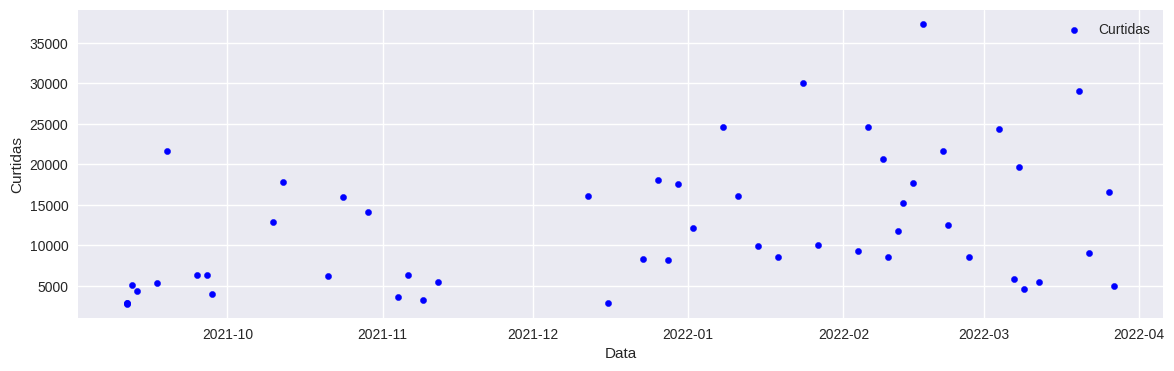

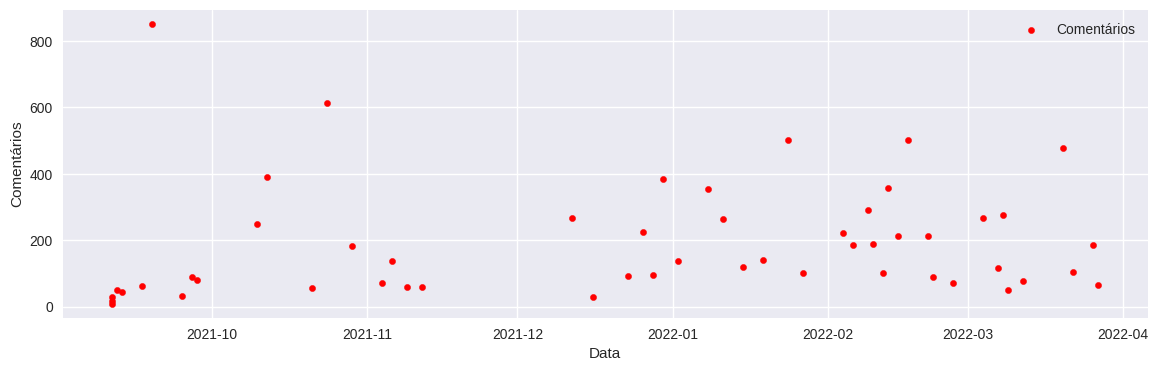

In [15]:
# Define um estilo para os gráficos do matplotlib
plt.style.use('seaborn-v0_8')

# Plota um gráfico de dispersão para verificarmos uma possível correlação entre o número de curtidas e a data da publicação
base.plot(kind='scatter', x='Data', y='Curtidas', color='blue', label='Curtidas', figsize=(14,4))

# Plota um gráfico de dispersão para verificarmos uma possível correlação entre o número de comentários e a data da publicação
base.plot(kind='scatter', x='Data', y='Comentários', color='red', label='Comentários', figsize=(14,4))

# Exibe os gráficos
plt.show()

**Observações:**

Parece não haver uma correlação entre o número de curtidas e o número de comentários das publicações com a data em que elas foram feitas. 

### Ordenando a Base

#### As 5 Melhores Publicações

In [16]:
# Exibe os registros das cinco publicações que mais tiveram curtidas
base.sort_values(by='Curtidas', ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


#### As 5 Piores Publicações

In [17]:
# Exibe os registros das cinco publicações que menos tiveram curtidas
base.sort_values(by='Curtidas', ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


**Observações:**

- Dentre as cinco publicações que mais obtiveram curtidas, todas tinham a presença de pessoas e envolviam alguma campanha
- Dentre as cinco publicações que menos obtiveram curtidas, nenhuma tinha a presença de pessoas e nenhuma envolvia alguma campanha

### Agregando Informações

In [19]:
# Configura a exibição de números decimais no pandas
pd.options.display.float_format = '{:,.2f}'.format

#### Segmentação por Pessoas

In [20]:
# Agrupa os dados com base na coluna de Pessoas, calculando a média de curtidas e de comentários
base.groupby('Pessoas')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


**Observação:**

Para este perfil, a média curtidas para publicações que têm pessoas é de cerca de 14.700 curtidas, enquanto que a média para publicações sem pessoa é de cerca de 4.300 curtidas. Com isso, percebemos que a média de curtidas de publicações com pessoas é cerca de 3,44 vezes a média de curtidas de publicações sem pessoas.  
Além disso, notamos que a média de comentários de publicações com pessoas é cerca de 4,4 vezes a média de comentários de publicações sem pessoas.

#### Segmentação por Pessoas e Campanhas

In [21]:
# Agrupa os dados com base nas colunas Pessoas e Campanhas, calculando a média de curtidas e de comentários
base.groupby(['Pessoas', 'Campanhas'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

**Observações:**

- Publicações com pessoas e com campanhas apresentam uma média de 19,4 mil curtidas
- Publicações com pessoas e sem campanhas têm uma média de quase 10 mil curtidas
- Se a publicação não tiver pessoas, sua média de curtidas será de, no máximo, 5,9 mil curtidas

Para este perfil, é evidente que a presença de pessoas em suas publicações gera um maior engajamento. Logo, a empresa deve publicar mais conteúdo que envolva pessoas.

#### Segmentação por Pessoas, Campanhas e Tipo

In [25]:
base.groupby(['Pessoas', 'Campanhas', 'Tipo'])[['Curtidas']].mean()

Curtidas
Pessoas Campanhas Tipo           
N       N         Foto   2,869.00
                  Reels  5,934.50
                  Vídeo  4,007.50
        S         Foto   5,852.50
S       N         Foto  10,815.29
                  IGTV   6,833.40
                  Reels 12,894.00
        S         Foto  19,105.38
                  Reels 24,801.00
                  Vídeo 16,409.50

**Observações:**

A média de curtidas para todos os tipos de publicações que envolviam pessoas ficou acima de 10 mil, exceto para o IGTV. Já as publicações que não envolviam pessoas tiveram uma média de curtidas abaixo de 6 mil.

**Observações:**

O perfil só publicou dois vídeos com pessoas e campanhas. Os demais vídeos não tinham pessoas e não eram vídeos de campanhas. Estes últimos apresentaram baixo desempenho.

Para obtermos mais insights, a empresa poderia fazer um experimento no qual ela publicaria vídeos com pessoas e sem envolver nenhuma campanha e vídeos sem pessoas mas envolvendo uma campanha. 

#### Segmentação por Carrossel

In [31]:
base.loc[base['Tipo'] == 'Foto'].groupby('Carrossel')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


**Observações:**

Notamos que publicações que são carrossel não são tão relevantes para o engajamento com as publicações deste perfil.

## Conclusões

Com a análise realizada, chegamos as seguintes conclusões para o perfil de nosso cliente:

- Publicações que envolvem pessoas engajam muito mais do que publicações que não contam com a presença de pessoas
- Publicações que envolvem alguma campanha da empresa apresentam melhor engajamento
- O carrossel não foi um diferencial para melhorar o engajamento